In [1]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [2]:
df=pd.read_csv('may 2023.csv')
orders=pd.read_csv('May orders 2023.csv')

In [3]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [4]:
df

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id
0,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,04/05/2023 12:48:08,order_LlUyznrKijM9SW,HAPUS MANGOES 1DOZ,1200.0,1.0,1200.0,1215.0,INR,failed,pay_LlV5X8ThjGSlQQ
1,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,04/05/2023 12:48:08,order_LlUyznrKijM9SW,DELIVERY,15.0,1.0,15.0,1215.0,INR,failed,pay_LlV5X8ThjGSlQQ
2,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,02/05/2023 11:53:12,order_Lkh59JBXbkz2zH,MUSKMELON 1PC,135.0,2.0,270.0,270.0,INR,captured,pay_Lkh5HGOi4PamvX
3,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,02/05/2023 08:17:04,order_LkdOuPjuXN0jjS,POMEGRANATE 1KG,350.0,1.0,350.0,2353.0,INR,captured,pay_LkdOxxcn4TyGgQ
4,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,02/05/2023 08:17:04,order_LkdOuPjuXN0jjS,HAPUS MANGOES 1DOZ,1200.0,1.0,1200.0,2353.0,INR,captured,pay_LkdOxxcn4TyGgQ
...,...,...,...,...,...,...,...,...,...,...,...,...
835,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,POMEGRANATE 1KG,350.0,1.0,350.0,1510.0,INR,captured,pay_LwAFjNSEiTVoQr
836,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,MOSUMBI LOCAL 1kg,165.0,1.0,165.0,930.0,INR,captured,pay_LxjQigbGWf4sMa
837,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,KIWI BOX,200.0,1.0,200.0,930.0,INR,captured,pay_LxjQigbGWf4sMa
838,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,BLUEBERRIES 2 BOX,550.0,1.0,550.0,930.0,INR,captured,pay_LxjQigbGWf4sMa


In [5]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]


In [6]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [7]:
orders

,order_id,name,email
0,order_LkFXrnxUTuciRR,Richa Chourasia,ricmchou@gmail.com
1,order_LkFeZMX9UX0tjh,Richa Chourasia,ricmchou@gmail.com
2,order_LkFhHAdR3NdmLd,Richa Chourasia,ricmchou@gmail.com
3,order_LkHc9pa0KYdvii,Jaya Prasad,rishabh@earthharvests.com
4,order_LkHcYVunwqBZjT,Jaya Prasad,rishabh@earthharvests.com
...,...,...,...
174,order_LvxOF7f8BKGCVB,Michelle Baptist,michbaptist@gmail.com
175,order_Lw7eGlUg6tQA1o,JASMA KAPADIA,jasmak999@yahoo.com
176,order_LwAF8HOAgozXLw,Vijay Dubey,VIJAYD1108@GMAIL.COM
177,order_LwJkYOugVi60cM,kanchan,samtani.kanchan@bcg.com


In [8]:
orders.isnull().sum()

order_id    0
name        4
email       4
dtype: int64

In [9]:
orders[orders['name'].isnull()]

,order_id,name,email
27,order_Ll9SAbzmBOvUkK,NaN,NaN
106,order_LqloW95Zhxwbl0,NaN,NaN
144,order_LtmTDNb4xAd9bl,NaN,NaN
145,order_LuE0pkbC1ZtsQI,NaN,NaN


In [10]:
combined_data=pd.merge(df,orders,on='order_id',how="left")

In [11]:
combined_data[combined_data['name'].isnull()]['order_id']

678                     NaN
767    order_LxKTmQSGzGP2jW
768    order_LxKTmQSGzGP2jW
769    order_LxKTmQSGzGP2jW
775                     NaN
776                     NaN
812    order_LwyhMx5qPQThOn
813    order_LwyhMx5qPQThOn
814    order_LwyhMx5qPQThOn
815    order_LwyhMx5qPQThOn
816    order_LwyhMx5qPQThOn
817    order_LwyhMx5qPQThOn
818    order_LwyhMx5qPQThOn
819    order_Lwys2qrNfCncTf
820    order_Lwys2qrNfCncTf
821    order_Lwys2qrNfCncTf
822    order_Lwys2qrNfCncTf
823    order_Lwys2qrNfCncTf
824    order_Lwys2qrNfCncTf
836    order_LxjQZeDPofpyQH
837    order_LxjQZeDPofpyQH
838    order_LxjQZeDPofpyQH
839    order_LxjQZeDPofpyQH
Name: order_id, dtype: object

In [12]:
combined_data[combined_data['name'].isnull()]['item payment amount'].sum()

10735.0

In [16]:
combined_data.isnull().sum()

payment page id          0
payment page title       0
payment date             0
order_id                 0
item name                0
item amount              0
item quantity            0
item payment amount      0
total payment amount     0
currency                 0
payment status           0
payment id               0
name                    20
email                   20
dtype: int64

In [14]:
combined_data.dropna(subset=['order_id'],inplace=True)

In [15]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
767,pl_Luwmo4lHRiPEHw,"DRYFRUITS, SEEDS, NUTS MAY - 31",03/06/2023 10:14:00,order_LxKTmQSGzGP2jW,JUMBO ANJEER 500G,1125.0,2.0,2250.0,6360.0,INR,captured,pay_LxKULBIxM8tjhR,NaN,NaN
768,pl_Luwmo4lHRiPEHw,"DRYFRUITS, SEEDS, NUTS MAY - 31",03/06/2023 10:14:00,order_LxKTmQSGzGP2jW,PREMIUM ALMONDS 500G,900.0,2.0,1800.0,6360.0,INR,captured,pay_LxKULBIxM8tjhR,NaN,NaN
769,pl_Luwmo4lHRiPEHw,"DRYFRUITS, SEEDS, NUTS MAY - 31",03/06/2023 10:14:00,order_LxKTmQSGzGP2jW,WALNUTS 500G,1155.0,2.0,2310.0,6360.0,INR,captured,pay_LxKULBIxM8tjhR,NaN,NaN
812,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,Watermelon,155.0,1.0,155.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN
813,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,DELIVERY,15.0,1.0,15.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN
814,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,CHICKOO 1KG,180.0,1.0,180.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN
815,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,KIWI BOX,200.0,1.0,200.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN
816,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,IMPORTED APPLES 1KG,380.0,1.0,380.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN
817,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,ELAICHI BANANA 1DOZEN,120.0,1.0,120.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN
818,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 12:55:16,order_LwyhMx5qPQThOn,PAPAYA 1PC,100.0,1.0,100.0,1150.0,INR,captured,pay_LwyhYhwPzALn6g,NaN,NaN


In [17]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [18]:
combined_data_copy=combined_data.copy()

In [19]:
combined_data_copy.tail()

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email
835,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,POMEGRANATE 1KG,350.0,1.0,350.0,1510.0,INR,captured,pay_LwAFjNSEiTVoQr,Vijay Dubey,VIJAYD1108@GMAIL.COM
836,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,MOSUMBI LOCAL 1kg,165.0,1.0,165.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
837,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,KIWI BOX,200.0,1.0,200.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
838,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,BLUEBERRIES 2 BOX,550.0,1.0,550.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
839,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,DELIVERY,15.0,1.0,15.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN


### checking unique values and their count in each columns

In [20]:
combined_data_copy['payment page id'].nunique()

21

In [21]:
combined_data_copy['payment page id'].value_counts()

pl_Luwm77aC8DpF68    71
pl_LogYhuf1mBHscg    70
pl_LkIx8SN5GbuQG9    60
pl_LlvPfuJNpJmwvK    56
pl_LsBr8yg0Jk5lZE    55
pl_Logay7jId0fQiS    55
pl_LogbTyCHtE81ut    50
pl_LtPH4of4dkHiCL    48
pl_Llu8WuhRSQ1Oca    45
pl_Llu9HXoCL2ryhf    45
pl_LsBvOwSWzOzhGF    39
pl_LlrhVVdlf0ZREH    36
pl_Lw77t4FZvxried    33
pl_LsBsvfkbuk04lf    30
pl_LsC02WGhqpp2xv    30
pl_LuwpdZn0NKaWd0    30
pl_LlxzivvCjRtGuG    26
pl_Luwmo4lHRiPEHw    25
pl_LpoVGuUhKJzSae    14
pl_Lpz6Jme2F2b9hm    10
pl_LkIy8OumFtrb5p     9
Name: payment page id, dtype: int64

In [22]:
combined_data_copy['payment page title'].nunique()

21

In [23]:
combined_data_copy['payment page title'].value_counts()

FRUIT BASKET - MAY 29-31                  71
FORM - 1 VEGETABLES MAY 16th              70
FRUIT BASKET-- 03rd May                   60
FRUIT BASKET - MAY 8th - 13th             56
FRUIT BASKET - MAY 22-27                  55
FORM - 2 VEGETABLES MAY 16th              55
SALADS, EXOTIC VEGETABLES -\n MAY 16th    50
FRUIT BASKET - MAY 24-27                  48
FORM - 1 VEGETABLES MAY 9th               45
FORM - 2 VEGETABLES MAY 9                 45
FORM - 1 VEGETABLES MAY 23                39
SALADS, EXOTIC VEGETABLES -\n MAY 9th     36
FRUIT BASKET - JUNE3                      33
SALADS, EXOTIC VEGETABLES -\n MAY 23      30
FORM - 2 VEGETABLES MAY 23                30
SALADS, EXOTIC VEGETABLES -\n MAY 30      30
DRYFRUITS, SEEDS, NUTS MAY - 12th         26
DRYFRUITS, SEEDS, NUTS MAY - 31           25
FRUIT BASKET - MAY 15-20                  14
DRYFRUITS, SEEDS, NUTS MAY - 18           10
DRYFRUITS, SEEDS, NUTS-- 6th May           9
Name: payment page title, dtype: int64

In [24]:
combined_data_copy['order_id'].nunique()

146

In [25]:
combined_data_copy['payment id'].nunique()

153

In [29]:
df=combined_data_copy.groupby('order_id')['payment id'].first().reset_index()
combined_data_copy=pd.merge(combined_data_copy,df,on='order_id',how="left")

In [31]:
combined_data_copy['payment id']=combined_data_copy['payment id_y']
combined_data_copy.drop(columns=['payment id_x','payment id_y'],inplace=True)

In [32]:
combined_data_copy

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,name,email,payment id
0,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,04/05/2023 12:48:08,order_LlUyznrKijM9SW,HAPUS MANGOES 1DOZ,1200.0,1.0,1200.0,1215.0,INR,failed,Nilava Sinha,nilavasinha@ymail.com,pay_LlV5X8ThjGSlQQ
1,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,04/05/2023 12:48:08,order_LlUyznrKijM9SW,DELIVERY,15.0,1.0,15.0,1215.0,INR,failed,Nilava Sinha,nilavasinha@ymail.com,pay_LlV5X8ThjGSlQQ
2,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,02/05/2023 11:53:12,order_Lkh59JBXbkz2zH,MUSKMELON 1PC,135.0,2.0,270.0,270.0,INR,captured,Rachna Jain,may9wg@yahoo.com,pay_Lkh5HGOi4PamvX
3,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,02/05/2023 08:17:04,order_LkdOuPjuXN0jjS,POMEGRANATE 1KG,350.0,1.0,350.0,2353.0,INR,captured,Rupika,rupika.raman@gmail.com,pay_LkdOxxcn4TyGgQ
4,pl_LkIx8SN5GbuQG9,FRUIT BASKET-- 03rd May,02/05/2023 08:17:04,order_LkdOuPjuXN0jjS,HAPUS MANGOES 1DOZ,1200.0,1.0,1200.0,2353.0,INR,captured,Rupika,rupika.raman@gmail.com,pay_LkdOxxcn4TyGgQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,POMEGRANATE 1KG,350.0,1.0,350.0,1510.0,INR,captured,Vijay Dubey,VIJAYD1108@GMAIL.COM,pay_LwAFjNSEiTVoQr
833,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,MOSUMBI LOCAL 1kg,165.0,1.0,165.0,930.0,INR,captured,NaN,NaN,pay_LxjQigbGWf4sMa
834,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,KIWI BOX,200.0,1.0,200.0,930.0,INR,captured,NaN,NaN,pay_LxjQigbGWf4sMa
835,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,BLUEBERRIES 2 BOX,550.0,1.0,550.0,930.0,INR,captured,NaN,NaN,pay_LxjQigbGWf4sMa


In [27]:
# values_to_drop = ['pay_LUqE7lVkgOU9bH','pay_LUvsd49Yc5Itaz','pay_LXE2GgLFFZUL3l','pay_LZJWgSvAQc1gCS','pay_LZxtNQumNMNGY3','pay_LZxtUuQsPr4hEh']

# # Drop rows where Gender column has values in the list
# combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [33]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [34]:
combined_data_copy['item name'].unique()

array(['HAPUS MANGOES 1DOZ', 'DELIVERY', 'MUSKMELON 1PC',
       'POMEGRANATE 1KG', 'ELAICHI BANANA 1DOZEN', 'AVOCADOS 2 PCS',
       'REGULAR BANANA 1 DOZ', 'IMPORTED APPLES 1KG', 'GUAVA 1KG',
       'PAPAYA 1PC', 'Watermelon', 'DESI PAPAYA 1PC', 'CHICKOO 1KG',
       'BLUEBERRIES 2 BOX', 'RAIPUR GUAVA 1KG', 'KIWI BOX',
       'FLAME RED GRAPES 1 KG', 'WALNUTS 500G', 'MAKHANA 250G',
       'PINE NUTS 100G', 'PREMIUM ALMONDS 500G', 'CASHEWS 500G',
       'MACADAMIA NUTS 200G', 'S CURL KALE', 'GREEN ZUCCHINI 1PC',
       'BLUEBERRIES 2PUNNETS', 'YELLOW ZUCCHINI 1PC', 'BROCCOLI 1PC',
       'BUTTON WHITE MUSHROOM 2PACKS', 'S LETTUCE MIX', 'S ARAGULA',
       'S BUTTERHEAD', 'CELERY 250G', 'S ROMAINE', 'S SUMMERCRISP',
       'JAPANESE CUCUMBER 500G', 'BABY SPINACH', 'ICEBERG LETTUCE 1 PC',
       'CHERRY TOMATOES 250G', 'AVOCADOS 2 Pcs',
       'Brinjal Stripes Kateri 500g', 'Tendli 500g', 'Ladies Finger 250g',
       'Parwal 250g', 'French Beans 500g', 'Cauliflower',
       'Kheera Cucu

In [35]:
combined_data_copy['item name'].value_counts()

DELIVERY                 88
IMPORTED APPLES 1KG      23
HAPUS MANGOES 1DOZ       22
CHICKOO 1KG              22
KOLKATTA LYCHEES 1KG     22
                         ..
HONEY AWLA 500G           1
GIR KESAR MANGOES 5kg     1
Sweet Corn 2 Pc           1
Broad Beans 500g          1
ITALIAN BASIL             1
Name: item name, Length: 108, dtype: int64

In [36]:
combined_data_copy['name'].nunique()

71

In [37]:
combined_data_copy['payment status'].nunique()

2

In [38]:
combined_data_copy['payment status'].value_counts()

captured    571
failed      266
Name: payment status, dtype: int64

In [39]:
combined_data_copy.fillna('unknown',inplace=True)

In [40]:
combined_data_copy['name'].nunique()

72

In [41]:
combined_data_copy['email'].nunique()

42

In [42]:
combined_data_copy['name'].value_counts()

Michelle Baptist    91
Ruchi  Wahi         75
Indrani Jafar       65
kanchan             64
Richa Chourasia     34
                    ..
Savita jalan         2
Bhavna mehta         2
Ushma kapoor         2
yagnesh              2
Rachna Jain          1
Name: name, Length: 72, dtype: int64

In [43]:
combined_data_copy['currency'].value_counts()

INR    837
Name: currency, dtype: int64

#### cheching null value count

In [44]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
name                         0
email                        0
payment id                   0
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [45]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [46]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    68.219833
failed      31.780167
Name: payment status, dtype: float64

In [47]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [48]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [51]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

KeyError: "['payment id'] not found in axis"

In [52]:
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['order_id'].nunique()

4

In [53]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [54]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

In [55]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


FRUIT BASKET                 337
VEGETABLES                   284
SALADS, EXOTIC VEGETABLES    146
DRYFRUITS, SEEDS, NUTS        70
Name: payment page title, dtype: int64

In [56]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [57]:
combined_data_payment_completed['payment date'].value_counts()

15/05/2023 13:59:21    15
21/05/2023 17:16:26    15
28/05/2023 14:59:49    14
07/05/2023 22:35:03    14
14/05/2023 11:17:03    13
                       ..
03/05/2023 18:19:34     1
17/05/2023 15:29:51     1
30/05/2023 00:13:54     1
02/05/2023 11:53:12     1
03/05/2023 22:06:33     1
Name: payment date, Length: 152, dtype: int64

In [58]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [59]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [60]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [61]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [62]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [63]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [64]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [66]:
print("number of days for which we are performing our analysis")
combined_data_payment_completed['date'].min()

number of days for which we are performing our analysis


Timestamp('2023-05-01 00:00:00')

In [67]:
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['date']<'2023-06-1']


In [71]:
df = combined_data_payment_completed
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




display(df_grouped)


,name,email
0,abha shroff,anish24@gmail.com
1,anbe schacke,anne.schacke@expertium.com
2,aneesha mehra,aneeshamehra7@gmail.com
3,anita mishra,anish24@gmail.com
4,anubha,sawhney.anubha@gmail.com
5,archana swami,archanaswami@hotmail.com
6,asha,anish24@gmail.com
7,ashish billimoria,billimoriaash@gmail.com
8,bhavna mehta,anish24@gmail.com
9,collen,anish24@gmail.com


In [69]:
row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'jayaprasad'].index

# Update the value of the 'Email' column in the specified row
combined_data_payment_completed.loc[row_index, 'name'] = 'jaya prasad'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'namita'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'namita sahni'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'padmasree'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'padmashree'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'parul'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'parul kumar'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'sieemen'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'simeen oshidar'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'tanvi'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'tanvi jain patyal'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'ushma'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'ushma kapoor'

In [70]:
df

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,name,email,date,time,year,day,month
0,FRUIT BASKET,04/05/2023 12:48:08,order_LlUyznrKijM9SW,hapus mangoes 1doz,1200.0,1.0,1200.0,1215.0,nilava sinha,nilavasinha@ymail.com,2023-05-04,12:48:08,2023,4,5
1,FRUIT BASKET,04/05/2023 12:48:08,order_LlUyznrKijM9SW,delivery,15.0,1.0,15.0,1215.0,nilava sinha,nilavasinha@ymail.com,2023-05-04,12:48:08,2023,4,5
2,FRUIT BASKET,02/05/2023 11:53:12,order_Lkh59JBXbkz2zH,muskmelon 1pc,135.0,2.0,270.0,270.0,rachna jain,may9wg@yahoo.com,2023-05-02,11:53:12,2023,2,5
3,FRUIT BASKET,02/05/2023 08:17:04,order_LkdOuPjuXN0jjS,pomegranate 1kg,350.0,1.0,350.0,2353.0,rupika,rupika.raman@gmail.com,2023-05-02,08:17:04,2023,2,5
4,FRUIT BASKET,02/05/2023 08:17:04,order_LkdOuPjuXN0jjS,hapus mangoes 1doz,1200.0,1.0,1200.0,2353.0,rupika,rupika.raman@gmail.com,2023-05-02,08:17:04,2023,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,FRUIT BASKET,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,elaichi banana 1dozen,120.0,1.0,120.0,1510.0,vijay dubey,vijayd1108@gmail.com,2023-05-31,11:34:14,2023,31,5
829,FRUIT BASKET,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,papaya 1pc,100.0,1.0,100.0,1510.0,vijay dubey,vijayd1108@gmail.com,2023-05-31,11:34:14,2023,31,5
830,FRUIT BASKET,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,imported apples 1kg,380.0,2.0,760.0,1510.0,vijay dubey,vijayd1108@gmail.com,2023-05-31,11:34:14,2023,31,5
831,FRUIT BASKET,31/05/2023 11:34:14,order_LwAF8HOAgozXLw,mosumbi local 1kg,165.0,1.0,165.0,1510.0,vijay dubey,vijayd1108@gmail.com,2023-05-31,11:34:14,2023,31,5


In [52]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [72]:
combined_data_payment_completed.groupby('name')['email'].unique().reset_index()

,name,email
0,abha shroff,[anish24@gmail.com]
1,anbe schacke,[anne.schacke@expertium.com]
2,aneesha mehra,[aneeshamehra7@gmail.com]
3,anita mishra,[anish24@gmail.com]
4,anubha,[sawhney.anubha@gmail.com]
5,archana swami,[archanaswami@hotmail.com]
6,asha,[anish24@gmail.com]
7,ashish billimoria,[billimoriaash@gmail.com]
8,bhavna mehta,[anish24@gmail.com]
9,collen,[anish24@gmail.com]


In [73]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,kanchan,101
1,michelle baptist,91
2,ruchi wahi,75
3,indrani jafar,71
4,parul kumar,70
5,richa chourasia,45
6,padmashree,28
7,tanvi jain patyal,24
8,ekta bhatia,20
9,jaya prasad,20


In [74]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
0,FRUIT BASKET,101754.0
1,"DRYFRUITS, SEEDS, NUTS",62750.0
2,"SALADS, EXOTIC VEGETABLES",19125.0
3,VEGETABLES,15614.0


In [75]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
42,hapus mangoes 1doz,24050.0,21.0
2,avocados 2 pcs,13115.0,21.0
52,kolkatta lychees 1kg,11800.0,22.0
104,walnuts 500g,9240.0,8.0
76,premium almonds 500g,9000.0,10.0
...,...,...,...
46,italian basil,90.0,1.0
83,raw papaya 1pc 500g,80.0,2.0
22,chilli bhaji 250g,60.0,2.0
12,broad beans 500g,59.0,1.0


In [81]:
combined_data_payment_completed[combined_data_payment_completed['date']<'2023-05-06'].groupby('item name')['item payment amount(INR) '].sum().reset_index()

,item name,item payment amount(INR)
0,avocados 2 pcs,1370.0
1,blueberries 2 box,1200.0
2,cashews 500g,820.0
3,chickoo 1kg,1080.0
4,delivery,75.0
5,desi papaya 1pc,500.0
6,elaichi banana 1dozen,594.0
7,flame red grapes 1 kg,650.0
8,guava 1kg,185.0
9,hapus mangoes 1doz,9600.0


In [76]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent=df_most_recent.reset_index()
df_most_recent.drop(columns='index')

,name,email,Most_recent_Purchase_date,Number of days after Purchase
0,vijay dubey,vijayd1108@gmail.com,2023-05-31,0 days
1,kanchan,samtani.kanchan@bcg.com,2023-05-31,0 days
2,jasma kapadia,jasmak999@yahoo.com,2023-05-31,0 days
3,michelle baptist,michbaptist@gmail.com,2023-05-30,1 days
4,deepti moga,deepti.moga@gmail.com,2023-05-30,1 days
5,simeen oshidar,simeenoshidar@gmail.com,2023-05-30,1 days
6,namita sahni,namitasahni@icloud.com,2023-05-30,1 days
7,preeti chaudhary,anish24@gmail.com,2023-05-29,2 days
8,indrani jafar,ani.doley@gmail.com,2023-05-29,2 days
9,swaha sohm,anish24@gmail.com,2023-05-29,2 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

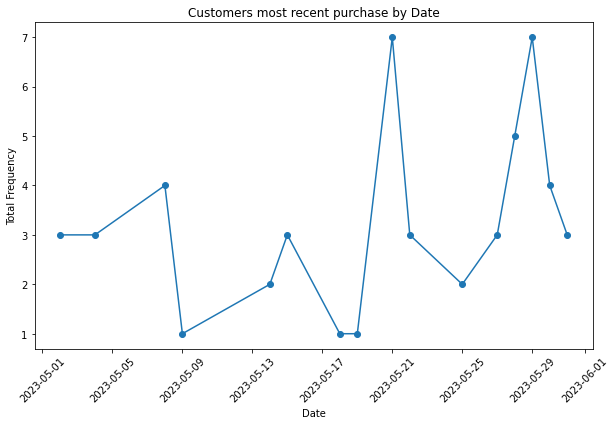

In [77]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [78]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame

df_oldest_date=df_oldest_date.reset_index()
df_oldest_date.drop(columns='index')

,name,email,oldest_Purchase_date
0,parul kumar,2014parulkumar@gmail.com,2023-05-01
1,rashmi jokhakar,rrjokhakar@gmail.com,2023-05-02
2,shwetha kallaje,shwethakallaje@gmail.com,2023-05-02
3,indrani jafar,ani.doley@gmail.com,2023-05-02
4,richa chourasia,ricmchou@gmail.com,2023-05-02
5,rupika,rupika.raman@gmail.com,2023-05-02
6,rachna jain,may9wg@yahoo.com,2023-05-02
7,nidhi,nkatiyar2000@yahoo.co.in,2023-05-04
8,yagnesh,yagss@yahoo.com,2023-05-04
9,nilava sinha,nilavasinha@ymail.com,2023-05-04


In [79]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount.head(10)

,name,item payment amount(INR)
0,michelle baptist,22838.0
1,priya balan,16020.0
2,parul kumar,13011.0
3,kanchan,12589.0
4,indrani jafar,12050.0
5,namita sahni,9245.0
6,yogesh thakkar,8350.0
7,anubha,7840.0
8,richa chourasia,7402.0
9,ruchi wahi,7101.0


In [82]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
13,indrani jafar,9
29,parul kumar,8
18,michelle baptist,8
38,ruchi wahi,7
16,kanchan,5
28,padmashree,4
37,richa chourasia,4
4,anubha,4
43,simeen oshidar,3
42,shwetha kallaje,3


In [83]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,michelle baptist,8,22838.0,2854.0
1,priya balan,1,16020.0,16020.0
2,parul kumar,8,13011.0,1626.0
3,kanchan,5,12589.0,2517.0
4,indrani jafar,9,12050.0,1338.0
5,namita sahni,2,9245.0,4622.0
6,yogesh thakkar,1,8350.0,8350.0
7,anubha,4,7840.0,1960.0
8,richa chourasia,4,7402.0,1850.0
9,ruchi wahi,7,7101.0,1014.0


In [84]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,anubha,"DRYFRUITS, SEEDS, NUTS",2600.0
1,anubha,FRUIT BASKET,5240.0
2,indrani jafar,"DRYFRUITS, SEEDS, NUTS",3500.0
3,indrani jafar,FRUIT BASKET,4075.0
4,indrani jafar,"SALADS, EXOTIC VEGETABLES",3315.0
5,indrani jafar,VEGETABLES,1160.0
6,kanchan,FRUIT BASKET,6800.0
7,kanchan,VEGETABLES,5789.0
8,michelle baptist,"DRYFRUITS, SEEDS, NUTS",9660.0
9,michelle baptist,FRUIT BASKET,9625.0


In [85]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['VEGETABLES']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",VEGETABLES,Total Amount(INR)
0,michelle baptist,9660.0,9625.0,1345.0,2208.0,22838.0
1,priya balan,16020.0,0.0,0.0,0.0,16020.0
2,parul kumar,2535.0,8701.0,260.0,1515.0,13011.0
3,kanchan,0.0,6800.0,0.0,5789.0,12589.0
4,indrani jafar,3500.0,4075.0,3315.0,1160.0,12050.0
5,namita sahni,9245.0,0.0,0.0,0.0,9245.0
6,yogesh thakkar,6255.0,2095.0,0.0,0.0,8350.0
7,anubha,2600.0,5240.0,0.0,0.0,7840.0
8,richa chourasia,0.0,6100.0,570.0,732.0,7402.0
9,ruchi wahi,0.0,1450.0,3475.0,2176.0,7101.0


In [86]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['VEGETABLES(percentage) ']=round(pivot_table_p['VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)

#pivot_table_p['HERBS & SALADS(percentage) ']=round(pivot_table_p['HERBS & SALADS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES','VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)",VEGETABLES(percentage)
0,michelle baptist,22838.0,42.14,42.30,5.89,9.67
1,priya balan,16020.0,0.00,100.00,0.00,0.00
2,parul kumar,13011.0,66.87,19.48,2.00,11.64
3,kanchan,12589.0,54.02,0.00,0.00,45.98
4,indrani jafar,12050.0,33.82,29.05,27.51,9.63
5,namita sahni,9245.0,0.00,100.00,0.00,0.00
6,yogesh thakkar,8350.0,25.09,74.91,0.00,0.00
7,anubha,7840.0,66.84,33.16,0.00,0.00
8,richa chourasia,7402.0,82.41,0.00,7.70,9.89
9,ruchi wahi,7101.0,20.42,0.00,48.94,30.64


In [108]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['VEGETABLES']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']+pivot_table_bottom['HERBS & SALADS']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

In [87]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,anubha,"[delivery, pomegranate 1kg, imported apples 1kg, kiwi box, premium almonds 500g, soft dates 500g, watermelon, kolkatta lychees 1kg, hapus mangoes 1doz]"
1,indrani jafar,"[watermelon, avocados 2 pcs, kiwi box, button white mushroom 2packs, broccoli 1pc, cherry tomatoes 250g, delivery, japanese cucumber 500g, green capsicum 500g, cauliflower, tomatoes 1kg, parwal 25..."
2,kanchan,"[drumsticks 250g, cauliflower, french beans 500g, cucumber white 500g, onions 1kg, sweet potato 500g, green capsicum 500g, tomatoes 1kg, potatoes 1kg, dudhi, raw mango 500g, ladies finger 250g, ga..."
3,michelle baptist,"[blueberries 2 box, imported apples 1kg, pomegranate 1kg, regular banana 1 doz, gir kesar mangoes 5kg, delivery, avocados 2 pcs, macadamia nuts 200g, premium almonds 500g, cashews 500g, french bea..."
4,namita sahni,"[plain pista 500g, cashews 500g, soft dates 500g, mamra badam 500g, premium jumbo dates 500g]"
5,parul kumar,"[watermelon, desi papaya 1pc, hapus mangoes 1doz, chickoo 1kg, muskmelon 1pc, elaichi banana 1dozen, delivery, papaya 1pc, imported apples 1kg, pine nuts 100g, raw mango 500g, onions 1kg, potatoes..."
6,priya balan,"[premium almonds 500g, premium jumbo dates 500g, a2 gir cow ghee 500ml, turkish apricot 200g, walnuts 500g, pumpkin seeds 250g]"
7,richa chourasia,"[regular banana 1 doz, elaichi banana 1dozen, hapus mangoes 1doz, imported apples 1kg, guava 1kg, papaya 1pc, delivery, raipur guava 1kg, chickoo 1kg, kiwi box, flame red grapes 1 kg, watermelon, ..."
8,ruchi wahi,"[green zucchini 1pc, delivery, blueberries 2punnets, yellow zucchini 1pc, broccoli 1pc, button white mushroom 2packs, brinjal stripes kateri 500g, tendli 500g, ladies finger 250g, parwal 250g, fre..."
9,yogesh thakkar,"[mandarin mini oranges 1kg, hapus mangoes 1doz, chickoo 1kg, pomegranate 1kg, delivery, premium jumbo dates 500g, golden rasins 500g, walnuts 500g, honey awla 500g, salted pista 500g, cashews 500g]"


In [91]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,michelle baptist,"[blueberries 2 box, imported apples 1kg, pomegranate 1kg, regular banana 1 doz, gir kesar mangoes 5kg, delivery, avocados 2 pcs, macadamia nuts 200g, premium almonds 500g, cashews 500g, french bea...",22838.0
1,priya balan,"[premium almonds 500g, premium jumbo dates 500g, a2 gir cow ghee 500ml, turkish apricot 200g, walnuts 500g, pumpkin seeds 250g]",16020.0
2,parul kumar,"[watermelon, desi papaya 1pc, hapus mangoes 1doz, chickoo 1kg, muskmelon 1pc, elaichi banana 1dozen, delivery, papaya 1pc, imported apples 1kg, pine nuts 100g, raw mango 500g, onions 1kg, potatoes...",13011.0
3,kanchan,"[drumsticks 250g, cauliflower, french beans 500g, cucumber white 500g, onions 1kg, sweet potato 500g, green capsicum 500g, tomatoes 1kg, potatoes 1kg, dudhi, raw mango 500g, ladies finger 250g, ga...",12589.0
4,indrani jafar,"[watermelon, avocados 2 pcs, kiwi box, button white mushroom 2packs, broccoli 1pc, cherry tomatoes 250g, delivery, japanese cucumber 500g, green capsicum 500g, cauliflower, tomatoes 1kg, parwal 25...",12050.0
5,namita sahni,"[plain pista 500g, cashews 500g, soft dates 500g, mamra badam 500g, premium jumbo dates 500g]",9245.0
6,yogesh thakkar,"[mandarin mini oranges 1kg, hapus mangoes 1doz, chickoo 1kg, pomegranate 1kg, delivery, premium jumbo dates 500g, golden rasins 500g, walnuts 500g, honey awla 500g, salted pista 500g, cashews 500g]",8350.0
7,anubha,"[delivery, pomegranate 1kg, imported apples 1kg, kiwi box, premium almonds 500g, soft dates 500g, watermelon, kolkatta lychees 1kg, hapus mangoes 1doz]",7840.0
8,richa chourasia,"[regular banana 1 doz, elaichi banana 1dozen, hapus mangoes 1doz, imported apples 1kg, guava 1kg, papaya 1pc, delivery, raipur guava 1kg, chickoo 1kg, kiwi box, flame red grapes 1 kg, watermelon, ...",7402.0
9,ruchi wahi,"[green zucchini 1pc, delivery, blueberries 2punnets, yellow zucchini 1pc, broccoli 1pc, button white mushroom 2packs, brinjal stripes kateri 500g, tendli 500g, ladies finger 250g, parwal 250g, fre...",7101.0


In [92]:
detail_item=top_customer_detail[top_customer_detail['name']=='michelle baptist'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,premium almonds 500g,2700.0,3.0
1,blueberries 2 box,2300.0,4.0
2,avocados 2 pcs,1915.0,3.0
3,macadamia nuts 200g,1850.0,2.0
4,cashews 500g,1640.0,2.0
5,imported apples 1kg,1520.0,4.0
6,plain pista 500g,1415.0,1.0
7,walnuts 500g,1155.0,1.0
8,gir kesar mangoes 5kg,1000.0,1.0
9,kolkatta lychees 1kg,1000.0,2.0


In [93]:
detail_item=top_customer_detail[top_customer_detail['name']=='priya balan'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,premium jumbo dates 500g,4890.0,6.0
1,walnuts 500g,3465.0,3.0
2,a2 gir cow ghee 500ml,3150.0,3.0
3,premium almonds 500g,2700.0,3.0
4,pumpkin seeds 250g,945.0,3.0
5,turkish apricot 200g,870.0,3.0


In [94]:
detail_item=top_customer_detail[top_customer_detail['name']=='parul kumar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,hapus mangoes 1doz,3400.0,3.0
1,pine nuts 100g,1380.0,2.0
2,walnuts 500g,1155.0,1.0
3,muskmelon 1pc,945.0,7.0
4,watermelon,930.0,6.0
5,chickoo 1kg,900.0,5.0
6,imported apples 1kg,760.0,2.0
7,elaichi banana 1dozen,476.0,4.0
8,desi papaya 1pc,400.0,4.0
9,jamun 500g,260.0,1.0


In [95]:
detail_item=top_customer_detail[top_customer_detail['name']=='kanchan'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,payri mangoes 1doz,2300.0,2.0
1,avocados 2 pcs,1200.0,2.0
2,kolkatta lychees 1kg,1000.0,2.0
3,jamun 500g,800.0,2.0
4,lemon 200g,612.0,9.0
5,pear 1kg,600.0,2.0
6,tomatoes 1kg,526.0,13.0
7,palak bunch,456.0,12.0
8,potatoes 1kg,452.0,12.0
9,onions 1kg,424.0,12.0


### visualization

In [68]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR)
17,2023-01-24,17299.0
2,2023-01-04,13560.0
16,2023-01-23,12595.0
18,2023-01-26,9024.0
4,2023-01-08,8974.0
12,2023-01-17,8010.0
3,2023-01-05,6420.0
0,2023-01-02,5930.0
1,2023-01-03,5288.0
5,2023-01-09,5090.0


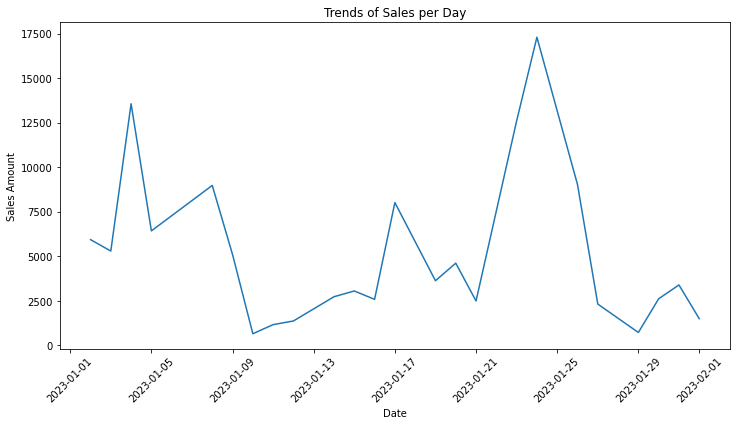

In [69]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
combined_data_payment_completed['date']

0     2023-01-02
1     2023-01-02
2     2023-01-02
3     2023-01-02
4     2023-01-02
         ...    
446   2023-01-30
447   2023-01-30
448   2023-01-30
449   2023-01-30
450   2023-01-30
Name: date, Length: 451, dtype: datetime64[ns]

<Figure size 1440x2160 with 0 Axes>

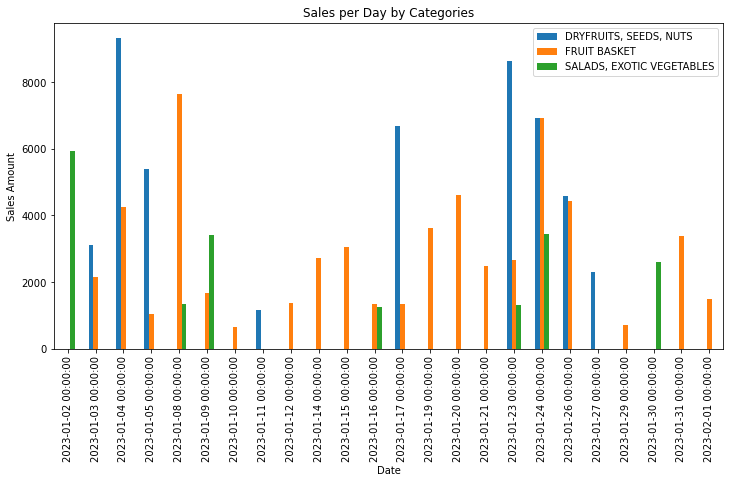

In [71]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

<Figure size 1440x2160 with 0 Axes>

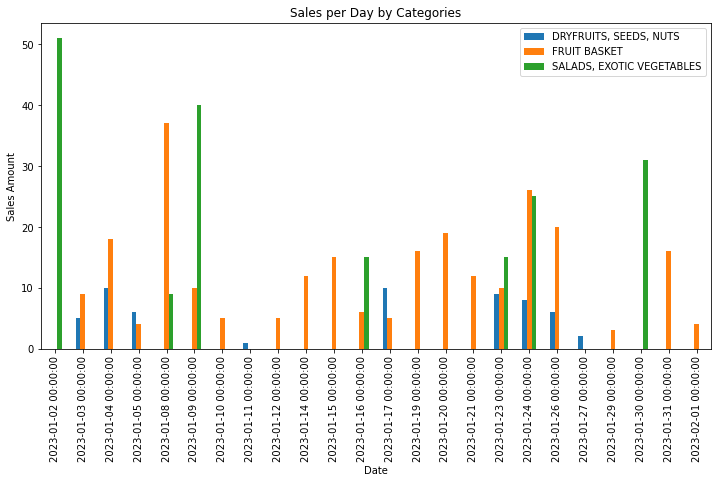

In [72]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [73]:
pd.set_option('display.max_colwidth', 200)

In [74]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [75]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount(INR),item sales quantity,buyers Name
0,a2 gir cow ghee 500ml,1,1050.0,1.0,[namita sahni]
1,brazil nuts 200g,2,1120.0,2.0,"[amirbanu virji, namita sahni]"
2,cashews 500g,5,4100.0,5.0,"[amirbanu virji, indrani jafar, namita sahni, ami gumashta, yogesh thakkar]"
3,dried cranberries 500g,2,1900.0,2.0,"[yogesh thakkar, dinmeher bunshah]"
4,golden rasins 500g,2,1000.0,2.0,"[yogesh thakkar, jasma kapadia]"
5,honey awla 500g,3,1080.0,3.0,"[yogesh thakkar, michelle baptist, ami gumashta]"
6,jumbo anjeer 500g,3,2970.0,3.0,"[yogesh thakkar, jasma kapadia, brinda upadhyaya]"
7,macadamia nuts 200g,1,925.0,1.0,[michelle baptist]
8,makhana 250g,2,975.0,3.0,"[yogesh thakkar, indrani jafar]"
9,mamra badam 500g,4,7120.0,4.0,"[dinmeher bunshah, indrani jafar, namita sahni, ami gumashta]"


Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [76]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
1,2023-01-04,9320.0,"[mamra badam 500g, plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g, dried cranberries 500g]"
5,2023-01-23,8620.0,"[macadamia nuts 200g, premium jumbo dates 500g, walnuts 500g, honey awla 500g, brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g]"
6,2023-01-24,6925.0,"[turkish apricot 200g, walnuts 500g, mixed seeds 250g, honey awla 500g, mamra badam 500g, cashews 500g, jumbo anjeer 500g]"
4,2023-01-17,6680.0,"[premium almonds 500g, prunes 250g, jumbo anjeer 500g, golden rasins 500g, turkish apricot 200g, walnuts 500g]"
2,2023-01-05,5390.0,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
7,2023-01-26,4590.0,"[walnuts 500g, premium jumbo dates 500g, prunes 250g, mixed seeds 250g, cashews 500g]"
0,2023-01-03,3125.0,"[dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g, honey awla 500g, makhana 250g]"
8,2023-01-27,2310.0,[walnuts 500g]
3,2023-01-11,1155.0,[walnuts 500g]


Dryfruits sales this month

### Fruits

In [77]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,6,7200.0,11.0,"[naina, yogesh thakkar, parul kumar, gayathri, jasma kapadia, dinmeher bunshah, nan]"
1,beauty pear 1kg,5,2400.0,8.0,"[parul kumar, indrani jafar, anubha, jasma kapadia, dinmeher bunshah]"
2,blueberries 2 box,11,9000.0,15.0,"[jaishankar vg, jasma kapadia, rachna jain, anubha, toral patel, gayathri, ushma, indrani jafar, simeen oshidar, dinmeher bunshah, asha gopalakrishnan, nan]"
3,delivery,20,555.0,37.0,"[naina, jaishankar vg, yogesh thakkar, jasma kapadia, rachna jain, mridula gupta, anubha, parul kumar, michelle baptist, kanchan samtani, toral patel, sonavi desai, indrani jafar, shwetha kallaje,..."
4,desi papaya 1pc,7,2100.0,21.0,"[naina, mridula gupta, parul kumar, sonavi desai, shwetha kallaje, ushma, dinmeher bunshah]"
5,elaichi banana 1dozen,3,472.0,4.0,"[parul kumar, dinmeher bunshah, naina]"
6,indian apples 1kg,5,1920.0,8.0,"[naina, mridula gupta, gayathri, dinmeher bunshah, yogesh thakkar]"
7,kiwi box,7,2600.0,13.0,"[jasma kapadia, rachna jain, anubha, toral patel, smita vats sharma, gayathri, dinmeher bunshah]"
8,malta oranges 1kg,8,1776.0,12.0,"[yogesh thakkar, anubha, toral patel, gayathri, sonavi desai, naina, dinmeher bunshah, asha gopalakrishnan]"
9,mosumbi local 1kg,5,1485.0,9.0,"[yogesh thakkar, mridula gupta, gayathri, kanchan samtani, dinmeher bunshah]"


In [78]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
3,2023-01-08,7636.0,"[raipur guava 1kg, mosumbi local 1kg, desi papaya 1pc, strawberries 1 box, nagpur oranges 1kg, delivery, indian apples 1kg, pomegranate 1kg, blueberries 2 box, malta oranges 1kg, kiwi box, new zea..."
15,2023-01-24,6931.0,"[new zealand queen apples 1kg, delivery, blueberries 2 box, beauty pear 1kg, avocados 2 pcs, kiwi box, pineapple, red grapes 500g, watermelon, elaichi banana 1dozen, desi papaya 1pc, regular banan..."
12,2023-01-20,4608.0,"[elaichi banana 1dozen, beauty pear 1kg, pomegranate 1kg, sitafal 1kg, new zealand queen apples 1kg, avocados 2 pcs, raipur guava 1kg, delivery, desi papaya 1pc, kiwi box, strawberries 1 box]"
16,2023-01-26,4434.0,"[muskmelon 1pc, desi papaya 1pc, delivery, new zealand queen apples 1kg, strawberries 1 box, malta oranges 1kg, avocados 2 pcs, indian apples 1kg, red grapes 500g, sitafal 1kg, mosumbi local 1kg, ..."
1,2023-01-04,4240.0,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, blueberries 2 box, kiwi box, muskmelon 1pc]"
11,2023-01-19,3621.0,"[mosumbi local 1kg, indian apples 1kg, malta oranges 1kg, strawberries 1 box, delivery, avocados 2 pcs, kiwi box, pomegranate 1kg, sitafal 1kg, blueberries 2 box, desi papaya 1pc, regular banana 1..."
18,2023-01-31,3384.0,"[indian apples 1kg, watermelon, elaichi banana 1dozen, avocados 2 pcs, strawberries 1 box, pomegranate 1kg, malta oranges 1kg, delivery, desi papaya 1pc, red grapes 500g, new zealand queen apples ..."
8,2023-01-15,3045.0,"[sitafal 1kg, strawberries 1 box, delivery, kiwi box, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, watermelon, desi papaya 1pc, regular banana 1 doz, indian apples 1kg]"
7,2023-01-14,2723.0,"[beauty pear 1kg, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, delivery, desi papaya 1pc, avocados 2 pcs, new zealand queen apples 1kg]"
14,2023-01-23,2660.0,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g, pomegranate 1kg]"


### Vegetables

In [79]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,buyers count,sales amount,item sales quantity,item name,buyers Name


In [80]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,item payment amount(INR),date,item name


### Exotic vegetables

In [81]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,4,2550.0,4.0,"[kanchan samtani, indrani jafar, toral patel, dinmeher bunshah]"
1,baby spinach,4,660.0,6.0,"[indrani jafar, shradha goenka, parvin dumasia, dinmeher bunshah]"
2,babybella mushroom 2packs,3,525.0,3.0,"[toral patel, dinmeher bunshah, kerbi patel]"
3,babycorn 1pack,4,390.0,6.0,"[trupti, michelle baptist, dinmeher bunshah, ashish billimoria]"
4,broccoli 1pc,7,680.0,8.0,"[kerbi patel, jasma kapadia, indrani jafar, naina, shradha goenka, madhu, dinmeher bunshah]"
5,button white mushroom 2packs,4,700.0,5.0,"[jasma kapadia, michelle baptist, dinmeher bunshah, naina]"
6,celery 250g,4,280.0,4.0,"[trupti, naina, dinmeher bunshah, kerbi patel]"
7,cherry tomatoes 250g,7,850.0,10.0,"[kanchan samtani, indrani jafar, naina, shradha goenka, toral patel, parvin dumasia, dinmeher bunshah]"
8,delivery,16,495.0,33.0,"[kerbi patel, trupti, kanchan samtani, meenal, ashish billimoria, jasma kapadia, dinmeher bunshah, michelle baptist, indrani jafar, abha mehta, naina, shradha goenka, madhu, toral patel, parvin du..."
9,green zucchini 1pc,2,170.0,2.0,"[dinmeher bunshah, ashish billimoria]"


In [82]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
0,2023-01-02,5930.0,"[broccoli 1pc, delivery, purple cabbage 1 pc, s romaine, red yellow capsicum 1pc, s swiss chard, s curl kale, s spicy mix, imported blueberries 2punnets, iceberg lettuce 1 pc, celery 250g, babycor..."
5,2023-01-24,3443.0,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,2023-01-09,3405.0,"[s summercrisp, s butterhead, button white mushroom 2packs, italian basil, delivery, s spicy mix, s lettuce mix, cherry tomatoes 250g, red yellow capsicum 1pc, broccoli 1pc, celery 250g, baby spin..."
6,2023-01-30,2608.0,"[babycorn 1pack, s butterhead, s summercrisp, delivery, japanese cucumber 500g, celery 250g, s curl kale, s swiss chard, red yellow capsicum 1pc, babybella mushroom 2packs, s aragula, iceberg lett..."
1,2023-01-08,1338.0,"[cherry tomatoes 250g, red yellow capsicum 1pc, avocados 2 pcs, iceberg lettuce 1 pc, purple cabbage 1 pc, babybella mushroom 2packs, delivery, italian basil]"
4,2023-01-23,1315.0,"[delivery, s lettuce mix, s aragula, cherry tomatoes 250g, baby spinach, s romaine]"
3,2023-01-16,1245.0,"[baby spinach, cherry tomatoes 250g, s aragula, s spicy mix, delivery, s romaine, s lettuce mix, s summercrisp, s butterhead]"


In [83]:
combined_data_payment_completed['name'].unique()

array(['kerbi patel', 'trupti', 'kanchan samtani', 'meenal',
       'ashish billimoria', 'jasma kapadia', 'dinmeher bunshah',
       'michelle baptist', 'indrani jafar', 'naina', 'jaishankar vg',
       'yogesh thakkar', 'rachna jain', 'amirbanu virji', 'mridula gupta',
       'anubha', 'parul kumar', 'toral patel', 'sonavi desai',
       'shwetha kallaje', 'abha mehta', 'shradha goenka', 'madhu',
       'namita sahni', 'ami gumashta', 'brinda upadhyaya',
       'smita vats sharma', 'gayathri', 'ushma', 'parvin dumasia',
       'meher mirza', 'simeen oshidar', 'asha gopalakrishnan', nan],
      dtype=object)

#### Indrani's data 

In [84]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

,item name,item quantity,item payment amount(INR)
10,mamra badam 500g,1.0,1780.0
20,salted pista 500g,1.0,1450.0
5,cashews 500g,1.0,820.0
0,avocados 2 pcs,1.0,700.0
12,pine nuts 100g,1.0,690.0
9,makhana 250g,2.0,650.0
21,strawberries 1 box,3.0,615.0
3,blueberries 2 box,1.0,600.0
8,japanese cucumber 500g,4.0,320.0
2,beauty pear 1kg,1.0,300.0


In [85]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

,date,item name
0,2023-01-02,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g]"
1,2023-01-05,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
2,2023-01-09,"[beauty pear 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, raipur guava 1kg, broccoli 1pc, baby spinach, s romaine, s aragula, purple cabbage 1 pc, s butterhead, red yellow capsicum 1pc, ..."
3,2023-01-23,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g]"


In [86]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,email,date,time,year,day,month,name
60,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,strawberries 1 box,215.0,2.0,430.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
61,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,delivery,15.0,1.0,15.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
62,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,sitafal 1kg,260.0,1.0,260.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
63,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,mosumbi local 1kg,165.0,1.0,165.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
64,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,avocados 2 pcs,650.0,1.0,650.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
65,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,pomegranate 1kg,350.0,1.0,350.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
66,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,nagpur oranges 1kg,145.0,1.0,145.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
67,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,malta oranges 1kg,148.0,1.0,148.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
85,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,dried cranberries 500g,950.0,1.0,950.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar
86,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,golden rasins 500g,500.0,1.0,500.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar


# END